## Clean And Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 
You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)
and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

   + Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
   + Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.

In the first few steps, we'll aim to do most of the data cleaning and start analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

   + ID: An id used to identify the participant of the survey
   + SeparationType: The reason why the person's employment ended
   + Cease Date: The year or month the person's employment ended
   + DETE Start Date: The year the person began employment with the DETE
Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

   + Record ID: An id used to identify the participant of the survey
   + Reason for ceasing employment: The reason why the person's employment ended
   + LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

## Identify Missing Values and Drop Unnecessary Columns

In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")
#Explore dete_survey using data exploration methods.
dete_survey.info()
print(dete_survey.head())
dete_survey.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [2]:
#Explore tafe_survey using data exploration methods.
tafe_survey.info()
print(tafe_survey.head())
tafe_survey.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

From the above results, we can make the conclusions as follows:
   + Both dataframes include missing values.
   + The dete_survey dataframe contains 'Not Stated' values that indicate missing values, but they are not represented as NaN.
   + For both dataframes, some columns are not needed for our analysis.
   + Both dataframes have several common columns, such as job dissatisfaction, but some of them with different names.

Next, we will take actions to clean and reshape our data.

To start, we'll handle the first three issues. Recall that we can use the pd.read_csv() function to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

In [3]:
#Read the dete_survey.csv CSV file into pandas again, but this time read the Not Stated values in as NaN.
dete_survey = pd.read_csv("dete_survey.csv", na_values = 'Not Stated')
print(dete_survey.head())

   ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

Then, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.

In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.iloc[:, 28:49], axis = 1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [5]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.iloc[:, 17:66], axis = 1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

## Clean Column Names

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

| dete_survey     | tafe_survey                                                               | Definition                                              |
|-----------------|---------------------------------------------------------------------------|---------------------------------------------------------|
| ID              | Record ID                                                                 | An id used to identify the participant of the survey    |
| SeparationType  | Reason for ceasing employment                                             | The reason why the participant's employment ended       |
| Cease Date      | CESSATION YEAR                                                            | The year or month the participant's employment ended    |
| DETE Start Date |                                                                           | The year the participant began employment with the DETE |
|                 | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years)        |
| Age             | CurrentAge. Current Age                                                   | The age of the participant                              |
| Gender          | Gender. What is your Gender?                                              | The gender of the participant                           |

Because we eventually want to combine them, we'll have to standardize the column names. 
Rename the remaining columns in the dete_survey_updated dataframe.
Use the following criteria to update the column names:
   + Make all the capitalization lowercase.
   + Remove any trailing whitespace from the end of the strings.
   + Replace spaces with underscores ('_').

Use the DataFrame.rename() method to update the columns below in tafe_survey_updated.  We'll handle the rest of the column names later.
   + 'Record ID': 'id'
   + 'CESSATION YEAR': 'cease_date'
   + 'Reason for ceasing employment': 'separationtype'
   + 'Gender. What is your Gender?': 'gender'
   + 'CurrentAge. Current Age': 'age'
   + 'Employment Type. Employment Type': 'employment_status'
   + 'Classification. Classification': 'position'
   + 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
   + 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [6]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ', '_').str.lower()
column_names = {'Record ID': 'id',
                'CESSATION YEAR': 'cease_date', 
                'Reason for ceasing employment': 'separationtype', 
                'Gender. What is your Gender?': 'gender', 
                'CurrentAge. Current Age': 'age',
                'Employment Type. Employment Type': 'employment_status',
                'Classification. Classification': 'position',
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(column_names, axis = 1)

Let's check the current status of the two dataframes and make sure our changes look good.

In [7]:
print(dete_survey_updated.head())
print(tafe_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

## Filter the Data

Next, let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:

   + Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [8]:
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

   + Resignation-Other reasons
   + Resignation-Other employer
   + Resignation-Move overseas/interstate

Remember that we'll have to account for each of these variations so we don't unintentionally drop data!
In each of dataframes, select only the data for survey respondents who have a 'Resignation' separation type.
The dete_survey_updated dataframe contains three Resignation separation types. We want to select all of them.
Use the DataFrame.copy() method on the result to avoid the SettingWithCopy Warning.

In [9]:
dete_resignations_bool = dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated[dete_resignations_bool].copy()
print(dete_resignations.head())
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
print(tafe_resignations.head())

    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...   work_life_balance  \


## Verify the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). 

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.
   + Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
   + Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [10]:
# Clean and verify the cease_date column in dete_resignations.
print(dete_resignations['cease_date'].value_counts().sort_index(ascending = False))
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False))

2013        74
2012       126
2010         1
12/2013     17
11/2013      9
10/2013      6
09/2013     11
09/2010      1
08/2013      4
07/2013      9
07/2012      1
07/2006      1
06/2013     14
05/2013      2
05/2012      2
01/2014     22
Name: cease_date, dtype: int64
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64


In [11]:
#Let's extract year information for cease_date in dete_resignations.
print(dete_resignations['cease_date'].isnull().sum())
pattern = r"/?([1-2][0-9]{3})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern, expand = False)
dete_resignations['cease_date']=dete_resignations['cease_date'].astype("float")
dete_resignations['cease_date'].value_counts().sort_index(ascending = True)

11


2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [12]:
#Verigy cease_date column in tafe_resignations.
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending = False))
print(tafe_resignations['institute_service'].value_counts().sort_index(ascending = False))

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64
More than 20 years    10
Less than 1 year      73
7-10                  21
5-6                   33
3-4                   63
11-20                 26
1-2                   64
Name: institute_service, dtype: int64


In [13]:
long_service_bool = tafe_resignations['institute_service']== 'More than 20 years'
print(tafe_resignations[long_service_bool]['cease_date'].value_counts().sort_index())

2010.0    2
2011.0    7
2012.0    1
Name: cease_date, dtype: int64


For both dataframes, cease dates are earlier than current date. Start dates were later than 1963, which makes sense. 

## Create a New Column

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

   + Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

We noticed that the tafe_resignations dataframe already contains a "service" column, which we renamed to "institute_service". In order to analyze both surveys together, we'll have to create a corresponding "institute_service" column in dete_resignations.

In [14]:
#Create an institute_service column in dete_resignations
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
#Check the result with Series.head() method
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identify Dissatisfied Employees

Previously, we created a new institute_service column that we'll use to analyze survey respondents according to their length of employment.Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

   + tafe_survey_updated:
      + Contributing Factors. Dissatisfaction
      + Contributing Factors. Job Dissatisfaction
   + dafe_survey_updated:
      + job_dissatisfaction
      + dissatisfaction_with_the_department
      + physical_work_environment
      + lack_of_recognition
      + lack_of_job_security
      + work_location
      + employment_conditions
      + work_life_balance
      + workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

To create the new column, we'll do the following:
   + Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values.
   + If any of the columns listed above contain a True value, we'll add a True value to a new column named dissatisfied. To accomplish this, we'll use the DataFrame.any() method.

In [15]:
#View the values in the related columns in tafe_resignations dataframe
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Next, we will update the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe so that each contains only True, False, or NaN values.

In [16]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
factors = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[factors] = tafe_resignations[factors].applymap(update_vals)
tafe_resignations[factors].head()

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False


In [17]:
#Create a dissatisfied column in both the tafe_resignations and dete_resignations dataframes
dissati_copy = tafe_resignations[factors].copy()
tafe_resignations['dissatisfied'] = dissati_copy.any(axis = 1, skipna = False)
dete_factors = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 
                'physical_work_environment', 'lack_of_recognition',
                'lack_of_job_security', 'work_location',
                'employment_conditions', 'work_life_balance', 'workload']
dete_dissati_copy = dete_resignations[dete_factors].copy()
dete_resignations['dissatisfied'] = dete_dissati_copy.any(axis = 1, skipna = False)
dete_resignations['dissatisfied'].head(20)

3     False
5      True
8     False
9      True
11    False
12    False
14     True
16     True
20    False
21    False
22     True
23     True
25     True
27    False
33     True
34     True
37    False
39     True
40    False
41     True
Name: dissatisfied, dtype: bool

After our changes, the new dissatisfied column will contain just the following values:

   + True: indicates a person resigned because they were dissatisfied with the job
   + False: indicates a person resigned because of a reason other than dissatisfaction with the job
   + NaN: indicates the value is missing

## Combine the Data

To recap, we've accomplished the following:

   + Renamed our columns
   + Dropped any data not needed for our analysis
   + Verified the quality of our data
   + Created a new institute_service column
   + Cleaned the Contributing Factors columns
   + Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column, so we will combine the data, and get the data into a form that's easy to aggregate.

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [18]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'
dete_resignations.info()
tafe_resignations.info()
print(tafe_resignations['Institute'].value_counts())
print(dete_resignations['classification'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 38 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envir

According to the result of dataframe.info() method, dete_resignations dataframe contains several columns that we don't need for our analysis. We need to drop those columns before we combine our datasets. There are 311 rows in dete_resignatoins dataframe, we will set thresh parameter to 250 to filter out the columns with more than 60 missing values when we apply dropna() method.

For tafe_resignations dataframe, it seems that we don't need to drop any columns with too many missing values.

In [19]:
dete_resignations = dete_resignations.dropna(thresh = 250, axis = 1)
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 31 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
region                                 265 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_environment              311 non-null bool
lack_of_recognition                    311 non-null bool
lack_of_job_security  

Next, let's combine these two dataframes.

In [20]:
combined = pd.concat([dete_resignations, tafe_resignations])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 46 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

## Clean the Service Column

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the institute_service column. This column is tricky to clean because it currently contains values in a couple different forms.

In [21]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


It seems the surveys from DETE and TAFE have different options for the answer  of service length. To analyze the data, we'll convert these numbers into categories. Based on a previous research, we'll use the slightly modified definitions below:
   + New: Less than 3 years at a company
   + Experienced: 3-6 years at a company
   + Established: 7-10 years at a company
   + Veteran: 11 or more years at a company

Let's categorize the values in the institute_service column using the definitions above.

In [22]:
combined['institute_service'] = combined['institute_service'].astype('str').str.extract(r"([0-9]+)", expand = False)
combined['institute_service'] = combined['institute_service'].astype('float')
combined['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Next, we'll map each value to one of the career stage definitions above.

In [23]:
def trans_to_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3.0:
        return 'New'
    elif val>=3.0 and val<=6.0:
        return 'Experienced'
    elif val>=7.0 and val<=10.0:
        return 'Established'
    elif val>=11.0:
        return 'Veteran'
combined['service_cat'] = combined['institute_service'].apply(trans_to_cat)
combined['service_cat'].head()

3     Established
5         Veteran
8     Experienced
9         Veteran
11    Experienced
Name: service_cat, dtype: object

## Perform Initial Analysis

Now, let's finally do our first piece of analysis! Recall that our end goal is to answer the following question:

   + Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [24]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 47 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

In [25]:
combined['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

The 'dissatisfied' column contain 8 missing values. While False are the majority values, we will fill the missing values with False. Then dataframe.pivot_table() method will be used to analyze the percentage of dissatisfied employees of each career stage group. Methods such as the dataframe.pivot_table() method actually treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. Calculating the mean will also calculate the percentage of dissatisfied employees. At last, we can plot the results with bar plot.

In [26]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)
combined['dissatisfied'].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

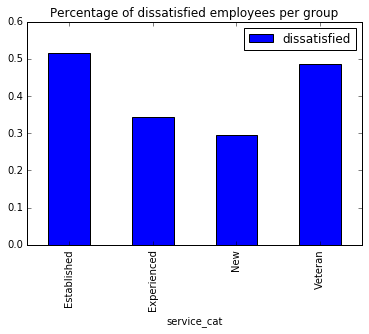

In [27]:
dissat_per=combined.pivot_table(values='dissatisfied', index='service_cat', aggfunc=np.mean)

%matplotlib inline
dissat_per.plot(kind = 'bar', title='Percentage of dissatisfied employees per group')

From the above bar chart, we noticed that less employees who work for the institute for a short period resigned due to dissatisfaction, while more employees working for a long period for the institute turned to resign because they were dissatisfied in some way. 